In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 1. Purpose

I was the Professor of this discipline. So, parallel to our traditional test-based classes, we had a virtual environment capable to support online interations and posts (forum-like).
So, given both real interactions (exams, named of sk_number_classroom) and online interactions (forum votes) some questions came up:
1. Is there any pattern between online behavior and exams performance?
2. Is it possible to predict student sucess based on his purely online interactions?
3. Any statistical study in order to bring insights

So, in this notebook, I'll try to fit the **second** question, trying to predict their success based on the online posts reactions received. This way, the learning environment could help teacher to support low interactive students and better understant their lacks.

In [ ]:
df_data_1 = pd.read_csv('../input/elearning-student-reactions/online_classroom_data.csv', index_col=0)
df_data_1.replace(',', '.', regex=True, inplace=True)
df_data_1.head()

# 2. Feature Scaling and target

In [ ]:
from sklearn import preprocessing

y = df_data_1['Approved'].values

X = df_data_1[['total_posts', 'helpful_post', 'nice_code_post', 'collaborative_post', 'confused_post','creative_post','bad_post','amazing_post','timeonline']].values
X = preprocessing.StandardScaler().fit(X).transform(X)

# 3. Simple Train/test split

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# 4. Model Fitting

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)
xgboost_yhat = xgb_model.predict(X_test)

# 5. Model Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,xgboost_yhat.round()))
print(classification_report(y_test,xgboost_yhat.round()))
print(accuracy_score(y_test, xgboost_yhat.round()))

# 6. Discussion and improvements

This was a model to predict student's sucess according their online variables. It is performing quite well. But I can see a lot of improvements on it to make it more robust:
1. Use some minority oversampling technique to improve data points (i.e SMOTE);
2. Hyperparameters tuning and more models;
3. A nice feture engineering;
4. An unsupervised approach.

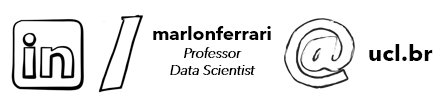